### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
#Load and view the first few rows of the dataset
df = pd.read_csv('Diabetes-2-1.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Data Preprocessing

In [3]:
#Display null-count and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


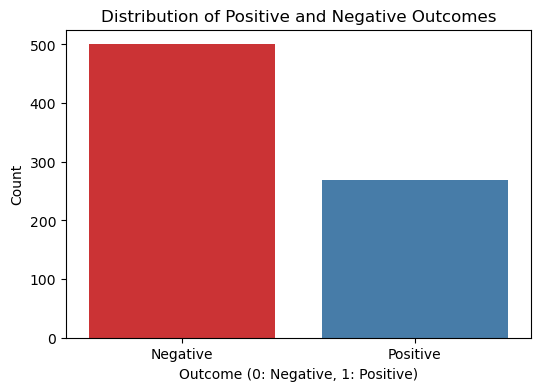

Outcome Counts:
Outcome
0    500
1    268
Name: count, dtype: int64


In [4]:
#Plot the frequency of the outcome (target) variable

outcome_counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', palette='Set1')
plt.title('Distribution of Positive and Negative Outcomes')
plt.xlabel('Outcome (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

print('Outcome Counts:')
print(outcome_counts)

In [5]:
# Display the descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Display columns with zero as missing values
zero_columns = df.columns[df.eq(0).any()]
print('Columns with 0 values:', zero_columns)

frequency = df[zero_columns].apply(lambda x: x.value_counts().get(0,0))
print('Frequency of 0 values in each column:')
print(frequency)

Columns with 0 values: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')
Frequency of 0 values in each column:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [7]:
# Create a copy of data set
df_copy = df.copy(deep = True)
df_copy.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
# Filling missing (0) values with the mean
columns_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_copy[columns_to_fill] = df_copy[columns_to_fill].replace(0, np.nan)
df_copy.fillna(df_copy.mean(), inplace = True)
df_copy.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


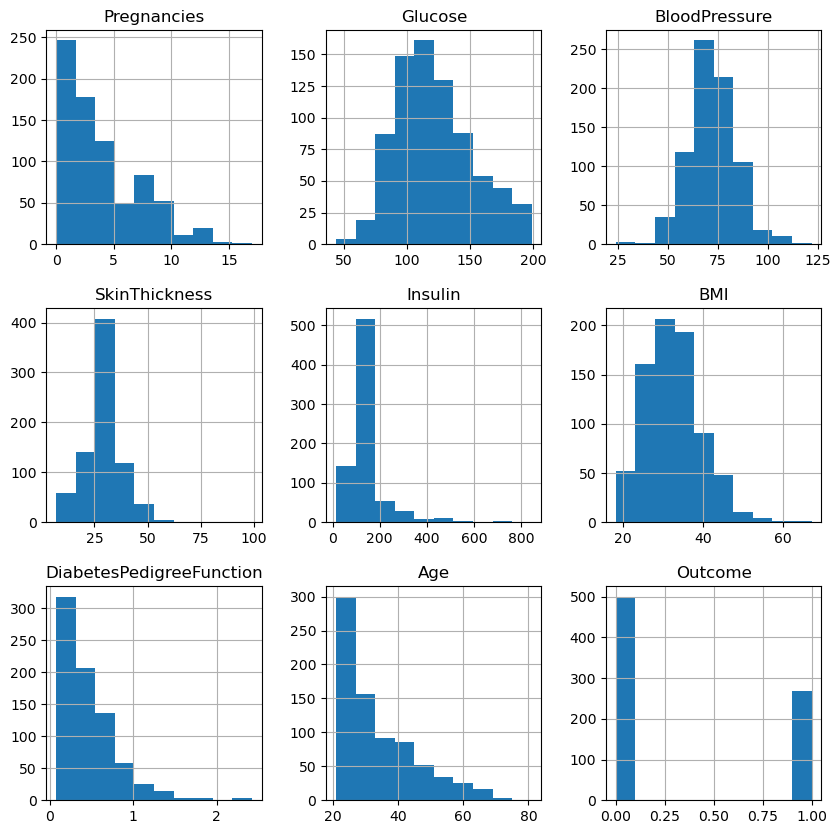

In [9]:
# Display the distribution of the various features in the dataset using a histogram after removing 0 values
df_distribution = df_copy.hist(figsize = (10,10))

In [10]:
#Display the descriptive statistics of the dataset after replacing missing (0) values
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


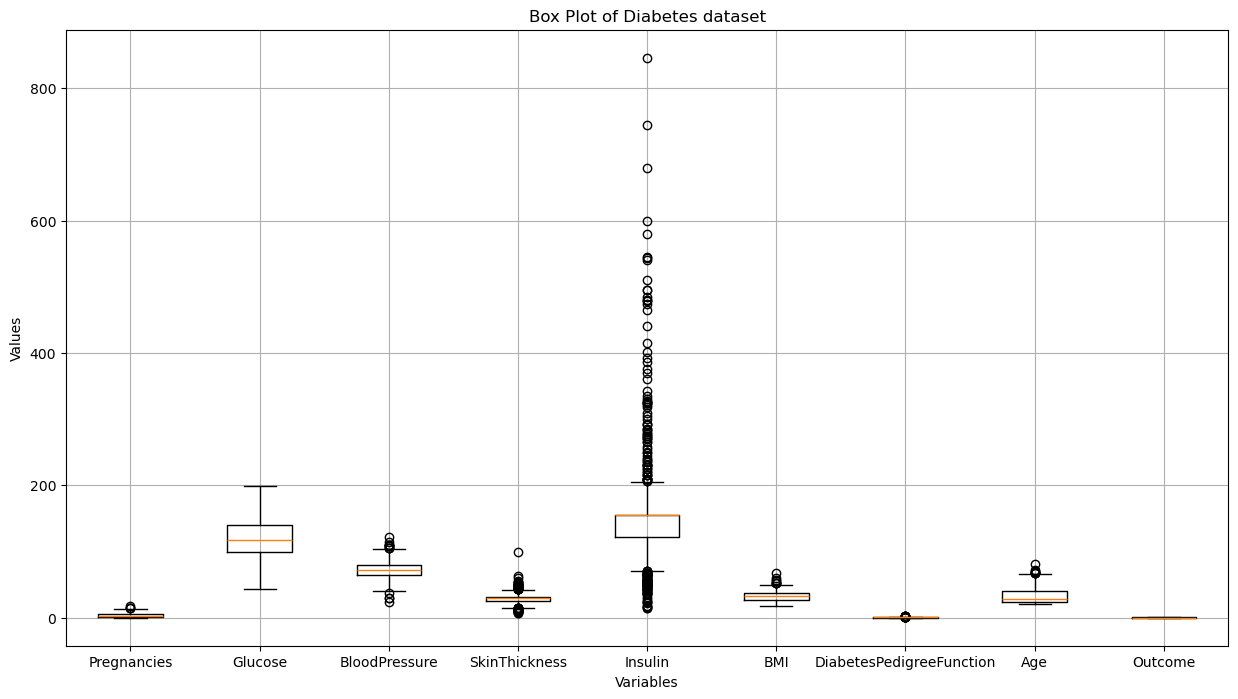

In [11]:
# Create a box plot showing outliers
plt.figure(figsize=(15, 8))
plt.boxplot(df_copy)
plt.title('Box Plot of Diabetes dataset')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(ticks=np.arange(1, 10), labels= df.columns)
plt.grid(True)
plt.show()

In [12]:
#Display the correlation table of the dataset
df_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


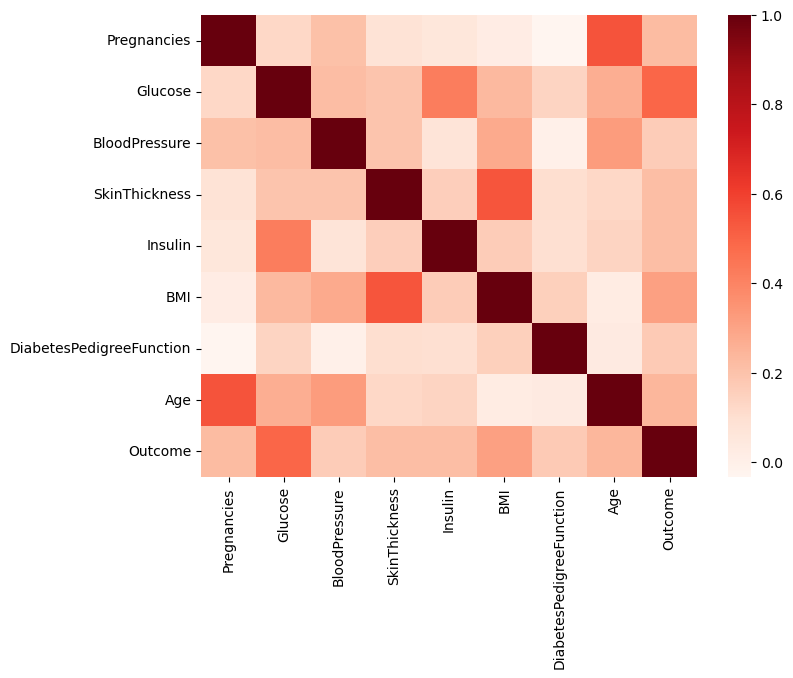

In [13]:
#Display heatmap of the correlation matrix
plt.figure(figsize=(8,6))
corr_max = sns.heatmap(df_copy.corr(), cmap = 'Reds') 

In [14]:
#Assign your x and y variable
x = df_copy.iloc[:, :-1].values
y = df_copy.iloc[:, -1].values

In [15]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [16]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

##

### Split data into Train and Test set

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
x_train

array([[ 0.90832902,  0.93627156,  0.44607305, ...,  0.36780137,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81645845, -1.05366073, ..., -0.63382702,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43232723,  1.44589558, ...,  2.81463643,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91566959, -0.63706802, ..., -1.13464121,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.21330299,  0.11279888, ..., -0.36195646,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47328628,  0.77934723, ..., -0.02462752,
         0.52121586,  2.94889395]])

In [21]:
x_test

array([[-0.89295432,  2.48505495,  0.36797839, ...,  1.75741893,
         2.78935129, -0.93064283],
       [-0.56553774, -0.47180508,  0.20642998, ...,  0.28879083,
        -0.27698825, -0.83598035],
       [ 0.08929543, -1.46813834, -0.76286054, ...,  0.35195763,
        -0.31725331, -0.64665539],
       ...,
       [ 0.08929543,  0.65308732,  1.17572049, ...,  1.93112763,
         0.4694641 , -0.93064283],
       [-0.23812115, -0.18254703,  0.20642998, ..., -0.86400328,
        -1.19689011, -0.74131787],
       [-0.89295432, -0.47180508,  0.04488156, ..., -0.15337678,
         1.01459113, -0.74131787]])

##

### Logistic Regression Model 

In [22]:
#Building Logistic regression model

from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score

In [23]:
# Define hyperparameters distribution
param_dist = {
    'C': uniform(loc=0, scale=4),  # Uniform distribution between 0 and 4
    'penalty': ['l1', 'l2'],  # Regularization penalties
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Define model
logreg_classifier = LogisticRegression()

# Randomized search
random_search = RandomizedSearchCV(estimator=logreg_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)

# Get best hyperparameters
best_params_lr = random_search.best_params_
print("Best hyperparameters for Logistic Regression:", best_params_lr)

Best hyperparameters for Logistic Regression: {'C': 0.08233797718320979, 'penalty': 'l2', 'solver': 'lbfgs'}


In [24]:
# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(solver = 'lbfgs', C = 0.1, penalty = 'l2', random_state = 0)

In [25]:
# Train the model
logreg_classifier.fit(x_train, y_train)

LogisticRegression(C=0.1, random_state=0)

In [26]:
# Predict on the test set
y_pred_logreg = logreg_classifier.predict(x_test)

In [27]:
#Display logistic regression coefficients
logreg_classifier.coef_

array([[ 0.2870623 ,  0.96767991, -0.10652675,  0.00984836, -0.04344247,
         0.56362358,  0.23783813,  0.21053462]])

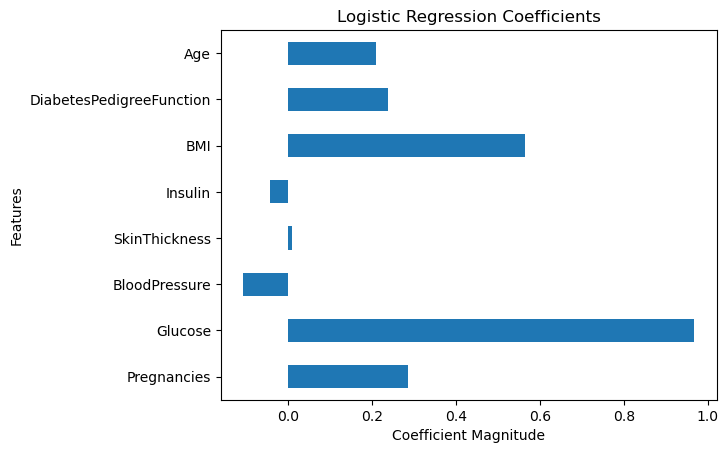

In [28]:
#plot the logreg coefficients 
X_df = pd.DataFrame(x, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

coefficients = logreg_classifier.coef_[0]

feature_coefficients = pd.Series(coefficients, index = X_df.columns)

feature_coefficients.plot(kind = 'barh')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients')
plt.show()

In [29]:
# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8116883116883117
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



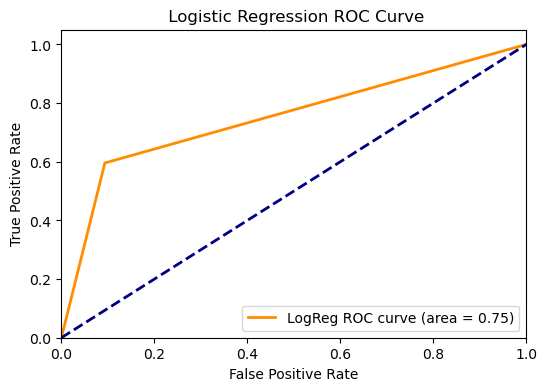

In [30]:
#Plot the Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve, auc

y_prob_logreg = logreg_classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='LogReg ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Logreg ROC Curve.png')
plt.show()

[[97 10]
 [19 28]]


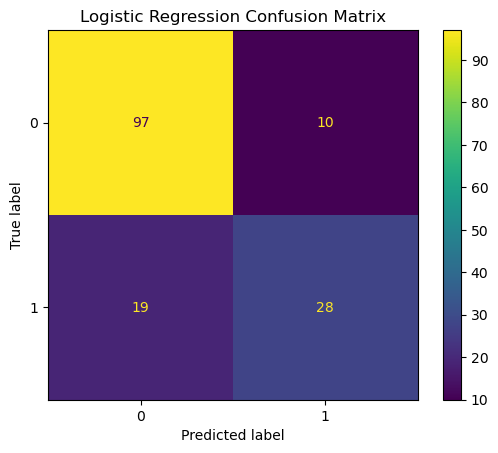

In [31]:
#Plot the confusion matrix for the logreg model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(cm_logreg)

disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels = logreg_classifier.classes_)
disp_logreg.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('logreg confusion matrix.png')
plt.show()

##

### Decision Tree Model

In [32]:
#Building the Decision Tree model
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
import sklearn.tree as tree

In [33]:
#Define hyperparameter for the decision tree model

param_dist = {
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion':['gini', 'entropy', 'log_loss']
}

# Define model
dtree_classifier = DecisionTreeClassifier()

# Random search
random_search = RandomizedSearchCV(estimator=dtree_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(x, y)

# Get best hyperparameters
best_params_dt = random_search.best_params_
print("Best hyperparameters for Decision Tree:", best_params_dt)

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 12}


In [34]:
## Initialize Logistic Regression classifier
dtree_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 0,
                                         min_samples_leaf = 19, min_samples_split = 12)

In [35]:
#Train the model
dtree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=19, min_samples_split=12,
                       random_state=0)

In [36]:
#Predict on the test set
y_pred_dtree = dtree_classifier.predict(x_test)

In [37]:
# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Accuracy:", accuracy_dtree)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.7922077922077922
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



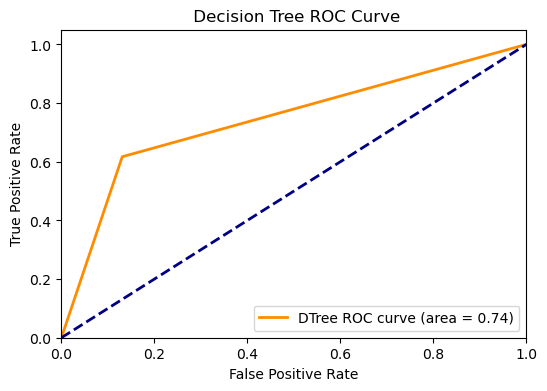

In [38]:
#Receiver Operating Characteristic Curve

y_prob_dtree = dtree_classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtree)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='DTree ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.savefig('DTree ROC Curve.png')
plt.show()

[[93 14]
 [18 29]]


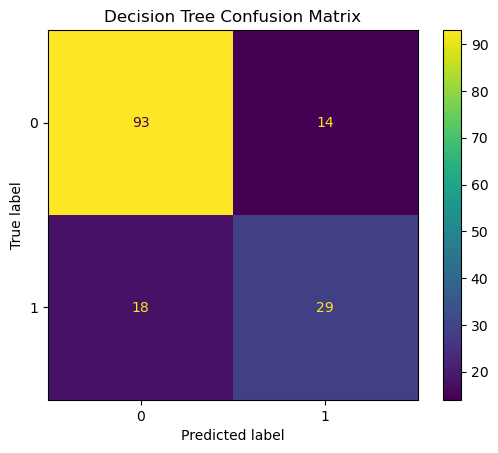

In [39]:
#Display confusin matrix for decision tree model
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
print(cm_dtree)

disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cm_dtree, display_labels = dtree_classifier.classes_)
disp_dtree.plot()
plt.title('Decision Tree Confusion Matrix')
plt.savefig('Dtree confusion matrix.png')
plt.show()

In [40]:
#Build a text report
text_report = export_text(dtree_classifier)
print(text_report)

|--- feature_1 <= 0.06
|   |--- feature_7 <= -0.42
|   |   |--- feature_5 <= -0.24
|   |   |   |--- feature_1 <= -0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  -0.24
|   |   |   |--- feature_3 <= -0.02
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.02
|   |   |   |   |--- feature_2 <= -0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  -0.68
|   |   |   |   |   |--- feature_5 <= 0.26
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  0.26
|   |   |   |   |   |   |--- class: 0
|   |--- feature_7 >  -0.42
|   |   |--- feature_5 <= -0.90
|   |   |   |--- class: 0
|   |   |--- feature_5 >  -0.90
|   |   |   |--- feature_4 <= -0.19
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  -0.19
|   |   |   |   |--- feature_6 <= 0.51
|   |   |   |   |   |--- feature_1 <= -0.73
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1

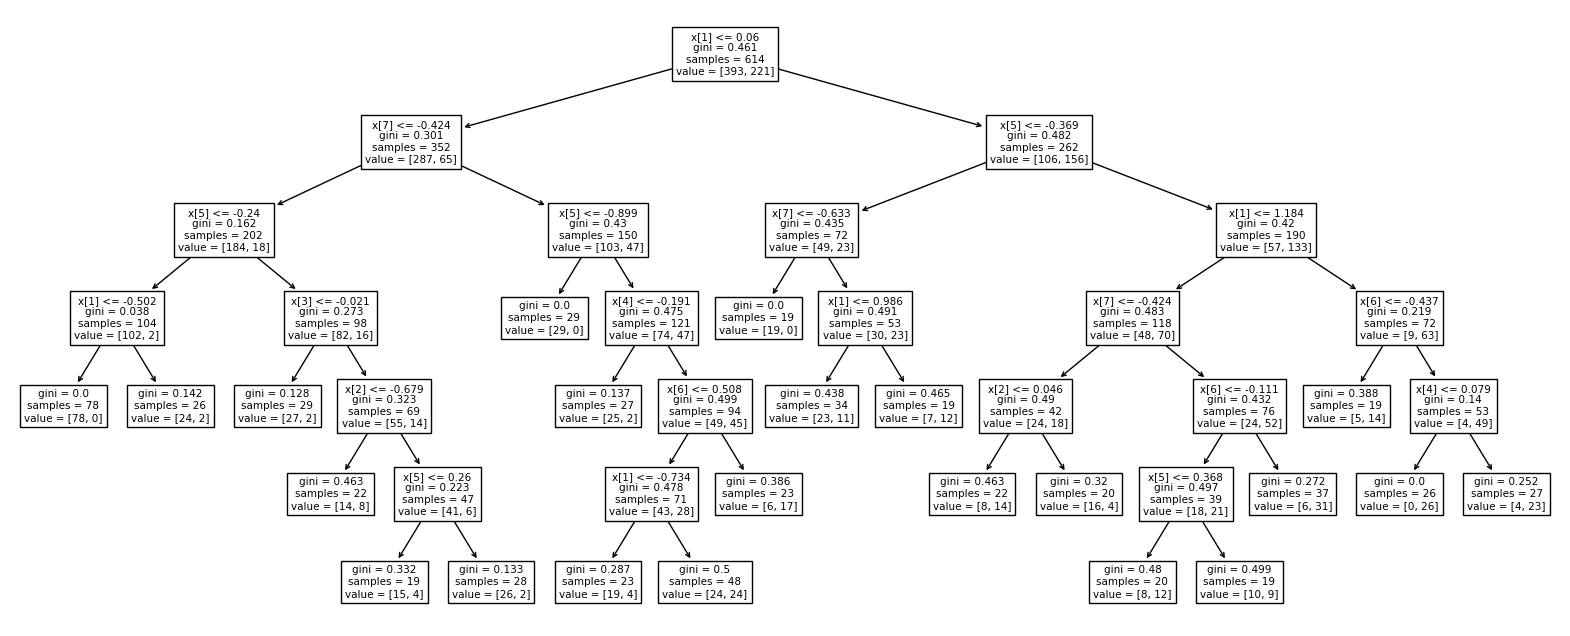

In [41]:
#Display the decision tree
plt.figure(figsize = (20,8))
tree.plot_tree(dtree_classifier)
plt.show()

### Support Vector Machine Model

In [42]:
#Building the support vector machine model
from sklearn.svm import SVC

In [43]:
param_dist = {
    'C': randint(1, 100),  # Randomly sample C from a uniform distribution between 1 and 100
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(2, 6), # Randomly sample degree from a uniform distribution between 2 and 5
    'class_weight': ['balanced', 'None'] 
}

# Create SVM classifier
svm_classifier = SVC()

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [44]:
#Initialize svm classifier
svm_classifier = SVC(kernel = 'linear', C = 10, gamma = 'scale', random_state = 0, probability = True, class_weight = 'balanced', degree = 3)

In [45]:
#Train the model
svm_classifier.fit(x_train,y_train)

SVC(C=10, class_weight='balanced', kernel='linear', probability=True,
    random_state=0)

In [46]:
#predict on the test set
y_pred_svm = svm_classifier.predict(x_test)

In [47]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.7727272727272727
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       107
           1       0.60      0.77      0.67        47

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.80      0.77      0.78       154



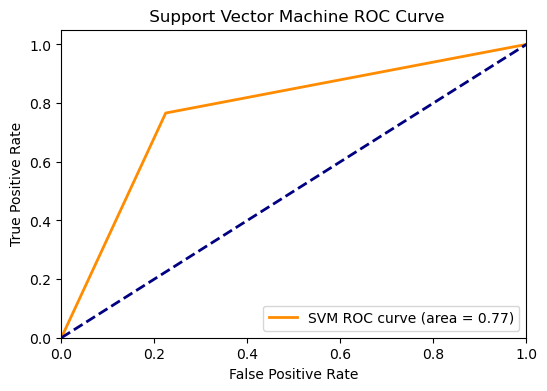

In [48]:
#Receiver Operating Characteristic Curve

y_prob_svm = svm_classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Support Vector Machine ROC Curve')
plt.legend(loc='lower right')
plt.savefig('SVM ROC Curve.png')
plt.show()

[[83 24]
 [11 36]]


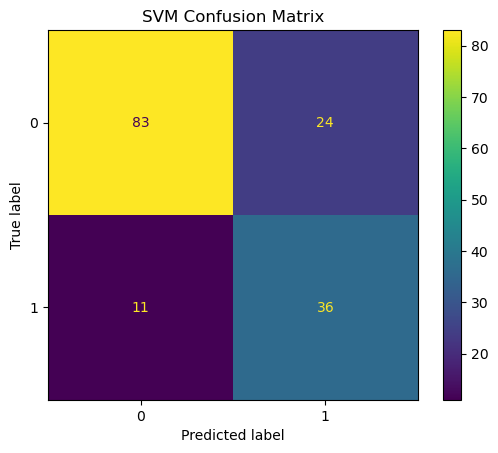

In [49]:
#Display confusion matrix for svm
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels = svm_classifier.classes_)
disp_svm.plot()
plt.title('SVM Confusion Matrix')
plt.savefig('SVM confusion matrix.png')
plt.show()

##

### Random Forest Model

In [50]:
#Building the random forest model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [89]:
# Define hyperparameters distribution
param_dist = {
    'n_estimators': [50, 100, 200, 400, 600, 800, 1000], 
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [10, 20, 30, 40, 50, 60],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Define model
rf_classifier = RandomForestClassifier()

# Randomized search
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)

# Get best hyperparameters
best_params_rf = random_search.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

Best hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 18, 'n_estimators': 100}


In [94]:
#Initialize the classifier
rf_classifier = RandomForestClassifier(bootstrap = True, max_depth = 40, max_features = 'sqrt', min_samples_leaf = 16, min_samples_split = 18, n_estimators = 100)

In [95]:
#Train the model with the training set
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=16, min_samples_split=18)

In [96]:
#predict on the test set
y_pred_rf = rf_classifier.predict(x_test)

In [97]:
#Display the random forest accuracy report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8051948051948052
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



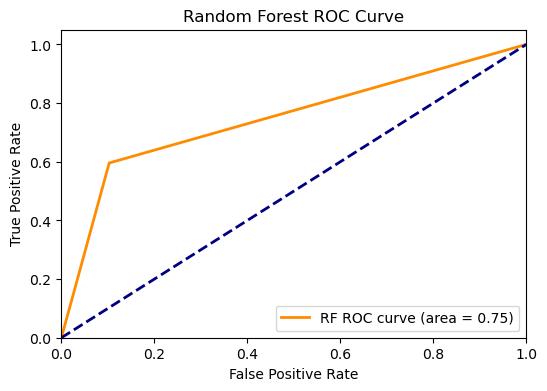

In [98]:
#Receiver Operating Characteristic Curve
y_prob_rf = rf_classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.savefig('RF ROC Curve.png')
plt.show()

[[96 11]
 [19 28]]


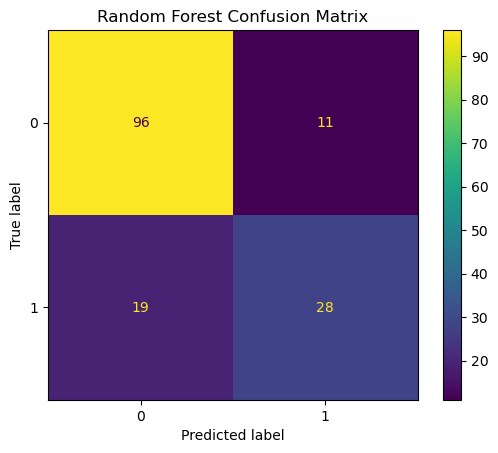

In [99]:
#Display the knn confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = rf_classifier.classes_)
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
plt.savefig('RF confusion matrix.png')
plt.show()

##

### K-Nearest Neighbours Model

In [51]:
#Building the KNN model
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# Define hyperparameters distribution
param_dist = {
    'n_neighbors': randint(1, 20),  # Random integer between 1 and 20
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for computing nearest neighbors
}

# Define model
knn_classifier = KNeighborsClassifier()

# Randomized search
random_search = RandomizedSearchCV(estimator=knn_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)

# Get best hyperparameters
best_params_knn = random_search.best_params_
print("Best hyperparameters for KNN:", best_params_knn)

Best hyperparameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}


In [53]:
#Initialize the KNN model
knn_classifier = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 9, weights = 'distance')

In [54]:
#Fit the model with the training set
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [55]:
#predict on the test set
y_pred_knn = knn_classifier.predict(x_test)

In [56]:
#Display the KNN model accuracy report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbour:", accuracy_knn)
print("K-Nearest Neighbour Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbour: 0.7922077922077922
K-Nearest Neighbour Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.67      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



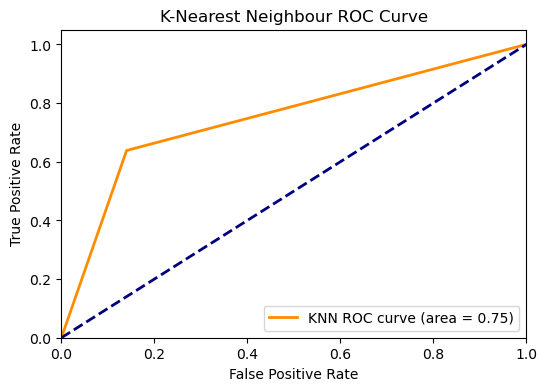

In [57]:
#Receiver Operating Characteristic Curve
y_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbour ROC Curve')
plt.legend(loc='lower right')
plt.savefig('KNN ROC Curve.png')
plt.show()

[[92 15]
 [17 30]]


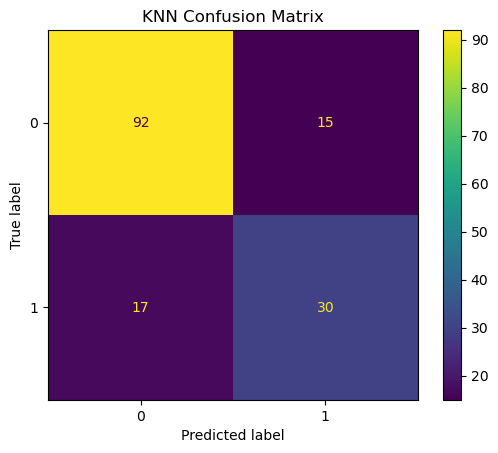

In [58]:
#Display the knn confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels = knn_classifier.classes_)
disp_knn.plot()
plt.title('KNN Confusion Matrix')
plt.savefig('KNN confusion matrix.png')
plt.show()

##

### Naïve Bayes Model

In [59]:
#Building the Naïve Bayes model
from sklearn.naive_bayes import GaussianNB

In [60]:
#Initialize the classifier
nb_classifier = GaussianNB()

In [61]:
#Fit the model with the training set
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [62]:
#Predict on the test set
y_pred_nb = nb_classifier.predict(x_test)

In [63]:
#Display the accuracy report of the NB model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes:", accuracy_nb)
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naïve Bayes: 0.7857142857142857
Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



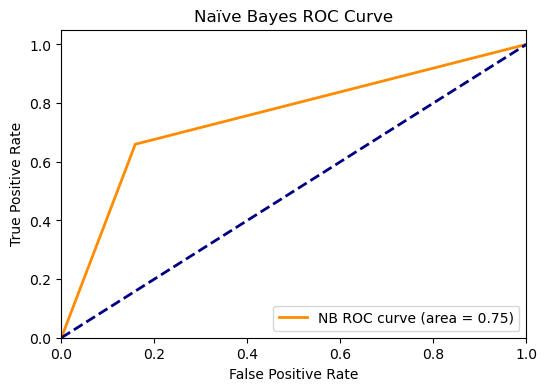

In [64]:
#Receiver Operating Characteristic Curve
y_prob_nb = nb_classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='NB ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naïve Bayes ROC Curve')
plt.legend(loc='lower right')
plt.savefig('NB ROC Curve.png')
plt.show()

[[90 17]
 [16 31]]


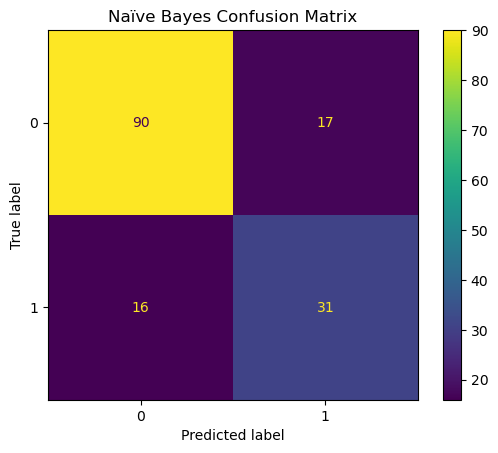

In [65]:
#Display the confusion matrix of the NB model
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

disp_nb = ConfusionMatrixDisplay(confusion_matrix = cm_nb, display_labels = nb_classifier.classes_)
disp_nb.plot()
plt.title('Naïve Bayes Confusion Matrix')
plt.savefig('NB confusion matrix.png')
plt.show()

##

## Models Performance Comparison

In [100]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbours', 'Naïve Bayes'],
    'Score': [accuracy_logreg, accuracy_dtree, accuracy_svm, accuracy_rf, accuracy_knn, accuracy_nb]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.811688
3,Random Forest,0.805195
1,Decision Tree,0.792208
4,K-Nearest Neighbours,0.792208
5,Naïve Bayes,0.785714
2,Support Vector Machine,0.772727


                    Model     Score
0     Logistic Regression  0.811688
4           Random Forest  0.805195
1     K-Nearest Neighbour  0.792208
3           Decision Tree  0.792208
5             Naïve Bayes  0.785714
2  Support Vector Machine  0.772727


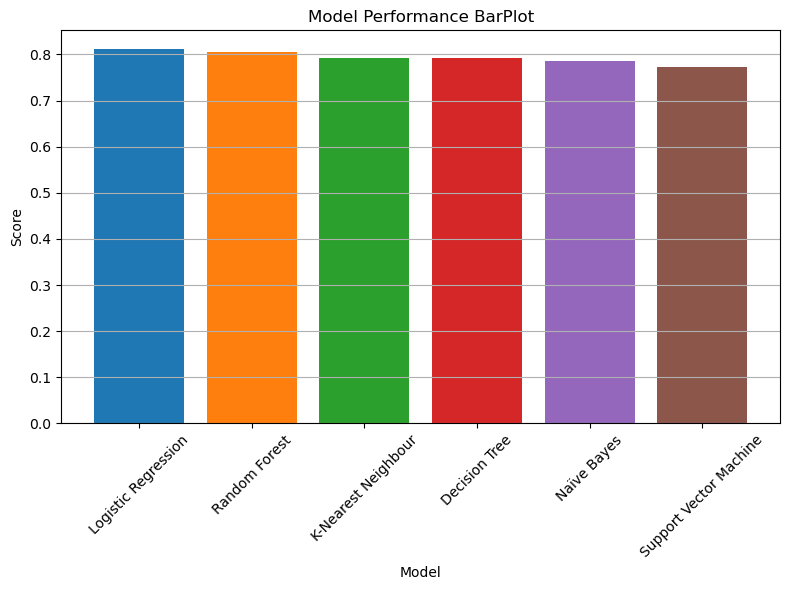

In [101]:
# Creating a DataFrame to compare the performance of different models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naïve Bayes'],
    'Score': [accuracy_logreg, accuracy_knn, accuracy_svm, accuracy_dtree, accuracy_rf, accuracy_nb]
})

# Sorting the DataFrame by the 'Score' column in descending order
models_sorted = models.sort_values(by='Score', ascending=False)
print(models_sorted)

# Plotting the performance of different models
plt.figure(figsize=(8, 6))
plt.bar(models_sorted['Model'], models_sorted['Score'], color=plt.cm.tab10(range(len(models_sorted))))
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance BarPlot')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('model_performance_barplot.png', bbox_inches='tight', pad_inches=0.1)
plt.show()